# Image segmentation

This will contain the code to extract the nucleus circlural image only from the dataset.

255.0


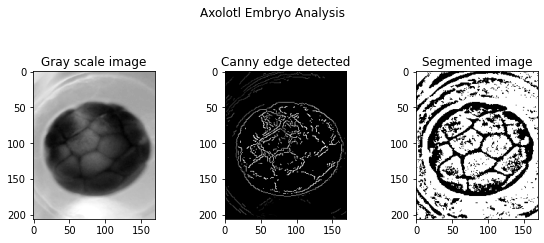

In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import Image

img = cv2.imread('/home/a.png', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('/home/gray.png', img)
im_bw = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
cv2.imwrite('/home/binary.png', im_bw)

v = np.median(im_bw)
print(v)
sigma = 0.33
lower = int(max(0, (1.0 - sigma) * v))
upper = int(min(255, (1.0 + sigma) * v))
edged = cv2.Canny(img, 35, 40)
cannyimg = img*edged

f, axarr = plt.subplots(1,3)
axarr[0].imshow(img, cmap='gray')
axarr[0].title.set_text("Gray scale image")
axarr[2].imshow(im_bw, cmap='gray')
axarr[2].title.set_text("Segmented image")
axarr[1].imshow(cannyimg, cmap='gray')
axarr[1].title.set_text("Canny edge detected")
f.tight_layout()
f.suptitle("Axolotl Embryo Analysis")
f.set_figheight(4)
f.set_figwidth(8)


**Playing around with the image warping libraries of OpenCV**

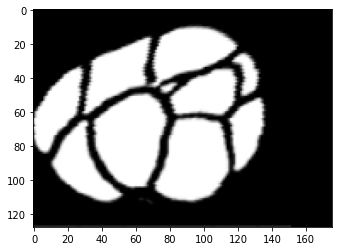

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

image = cv2.imread('/home/sample.png', cv2.IMREAD_GRAYSCALE)
rows, cols = image.shape

img_output = np.zeros(image.shape, dtype=image.dtype)

for i in range(rows):
    for j in range(cols):
        offset_x = int(128 * math.sin(2 * 3.14 * i / (2*cols)))
        offset_y = 64
        if j+offset_x < cols:
            img_output[i,j] = image[i,(j+offset_x)%cols]
        else:
            img_output[i,j] = 0


plt.imshow(img_output, cmap = 'gray')